# Exercise 4.2
Skylar Peven
DSC 530
01/12/2025

**3-1**
Something like the class size paradox appears if you survey
children and ask how many children are in their family. Families with many
children are more likely to appear in your sample, and families with no children have no chance to be in the sample.
Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.
Now compute the biased distribution we would see if we surveyed the children
and asked them how many children under 18 (including themselves) are in
their household.
Plot the actual and biased distributions, and compute their means.

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
Mean:  1.024205155043831
Biased Mean: 2.403679100664282


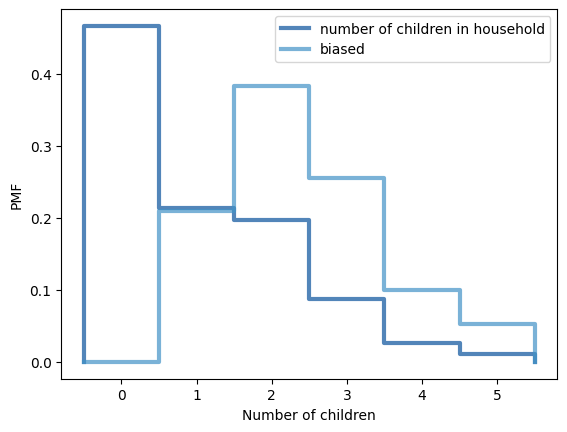

In [1]:
# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')


# Download the neccasary data.
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


# Downloads the python files neccasary for use with the course.
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
# Downloads the python files neccasary for this exercise.
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

import nsfg
import thinkstats2
import thinkplot

def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

# Reads the responses from nsfg and creates a data frame.
resp = nsfg.ReadFemResp()

# Construct the actual distribution for the number of children in the household
pmf = thinkstats2.Pmf(resp.numkdhh, label="number of children in household")

# Contructs the biased distribution.
biased = BiasPmf(pmf, label="biased")

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel="Number of children", ylabel="PMF")

# Mean
print("Mean: ", pmf.Mean())

# Biased Mean
print("Biased Mean:", biased.Mean())

**3-2**
In Chapter 3 we computed the mean of a sample by adding up
the elements and dividing by n.  If you are given a PMF, you can
still compute the mean, but the process is slightly different:
%
$$ \bar x = \sum_i p_i~x_i $$
%
where the $x_i$ are the unique values in the PMF and $p_i=PMF(x_i)$.
Similarly, you can compute variance like this:
%
$$ S^2 = \sum_i p_i~(x_i - \bar x)^2 $$
% 
Write functions called `PmfMean` and `PmfVar` that take a
Pmf object and compute the mean and variance.  To test these methods,
check that they are consistent with the methods `Mean` and `Var`
provided by `Pmf`.

In [2]:
def PmfMean(pmf):
    """Computes the mean of a PMF.

    Returns:
        float mean
    """
    mean = 0.0
    for x, p in pmf.d.items():
        mean += p * x
    return mean

# Checking for consistency.
print("Mean: ", thinkstats2.Pmf.Mean(pmf))
print("PmfMean: ", PmfMean(pmf))

Mean:  1.024205155043831
PmfMean:  1.024205155043831


In [3]:
def PmfVar(pmf, mu=None):
    """Computes the variance of a PMF.

    Args:
        mu: the point around which the variance is computed;
            if omitted, computes the mean

    Returns:
        float variance
    """
    if mu is None:
        mu = pmf.Mean()

    var = 0.0
    for x, p in pmf.d.items():
        var += p * (x - mu) ** 2
    return var

# Checking for consistency.
print("Var: ", thinkstats2.Pmf.Var(pmf))
print("PmfVar: ", PmfVar(pmf))

Var:  1.4128643263531195
PmfVar:  1.4128643263531195


**4-1**
How much did you weigh at birth? If you don’t know, call your
mother or someone else who knows. Using the NSFG data (all live births),
compute the distribution of birth weights and use it to find your percentile
rank. If you were a first baby, find your percentile rank in the distribution
for first babies. Otherwise use the distribution for others. If you are in the
90th percentile or higher, call your mother back and apologize.

In [4]:
# I am a first born.
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

import first

live, firsts, others = first.MakeFrames()

def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

# First born weights.
first_wgt = firsts.totalwgt_lb
# Remove rows with NA.
first_wgt_dropna = first_wgt.dropna()

print("Percentile Rank: ", PercentileRank(first_wgt_dropna, 9.8), "(Sorry, mom.)")

Percentile Rank:  97.66215906486363 (Sorry, mom.)


**4-2**
The numbers generated by random.random are supposed to be
uniform between 0 and 1; that is, every value in the range should have the
same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF.
Is the distribution uniform?


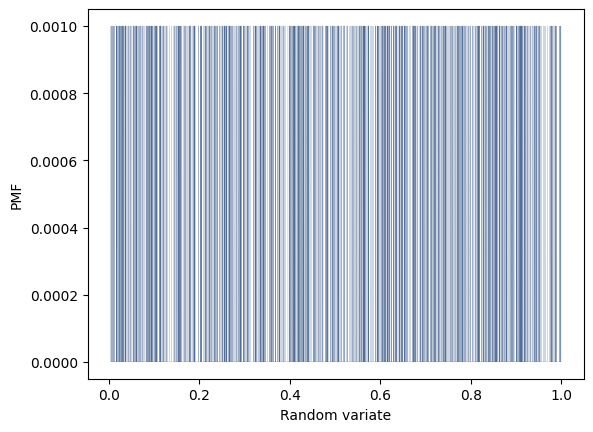

In [5]:
import numpy as np

# Generates 1000 Random numbers
rand_nums = np.random.random(1000)

# Plots PMF
pmf = thinkstats2.Pmf(rand_nums)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random variate', ylabel='PMF')

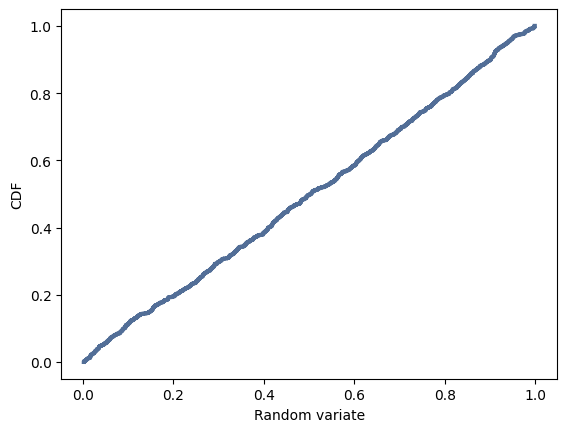

In [6]:
# Plots CDF
cdf = thinkstats2.Cdf(rand_nums)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random variate', ylabel='CDF')